# COGS 108 - Final Project 

# Overview

For this project, we looked at two different datasets that contained information on cost of attending college, and post-college earnings of students. We looked at different degree types and how their earnings differed for students right after they graduated compared to their earnings after they have been working for a few years. We also examined how the cost of attendance for different types of institutions might explain the expected earnings after college, and found that there was a weak correlation.

# Names

- Alisha Sehgal
- Austin Clark
- Peter Xu
- Richard Du


# Group Members IDs

- A15592727
- A91063616
- A15206122
- A92152605

# Research Question

What types of institutions pay back more after after graduation and mid-career? Does the type of institution (public vs private) affect the salaries of graduates? Lastly, does the region of the college affect the payout?

The problem we are investigating is the cost increases of higher education and its relationship to the salaries from the obtained degrees. With the cost of obtaining a bachelor’s degree, is it really worth it to pursue a certain level of education? Also, are the majors, or in our case groups of types of majors (later referred to as school type), that are usually viewed as those low-earning worth to pursue with a college degree? For the project, we try to answer the question of 1. What type/category of degrees at schools cost you the most, and 2. Do these combinations also make you more money in the long run compared to other less expensive bachelor degrees? 3. Does the school region and type of school have an effect on the starting and mid-career salaries of graduates?

## Background and Prior Work

There is a large difference between college completion of high and low income families and between completion of college for females and males. In the NBER working papers, college completion is measured by people who attain a bachelor’s degree by the time they are 25. Over the years, there has been an increase in the completion of college for females, but this increase is driven by the daughters of high income families, and does not account for females in low-income families. Between 1915 and 1983, college completion quadrupled. Again, most of this increase is accounted for by high-income families. This begs the question, is the price of college too high for the regular household?

Upon looking at another article about the worth of college, our group found that debt for college has become a large sum that often hinders students from living out their dreams. In fact, between 2010 and 2011, half of all of the college graduates were unemployed or employed below their skill level. If college isn’t getting students closer to what they want, then is it worth it? The article clarifies that for certain majors such as engineering or medical majors, college is necessary. It also singles out certain colleges, like Stanford, as being more worth it than others. However, overall, the book states that college is not necessary if one does not have a clear reason for going. Most people can go to the library and learn for themselves what their $100 grand plus would get them in college. To support this claim, the author states that 84% of employers have rated college graduates as not fully prepared for the workforce and only a little bit more prepared than a high school graduate.

College costs have been rising at a rate above the rate of inflation. They will continue to follow this trend and students will become more and more crippled by debt for the same education. Additionally, more students are being enrolled in universities, thus creating a more people competing for the same amount of resources scenario at nearly all public and state colleges. The large difference in lifetime earnings between those with and without college degrees is largely due to what those who graduate from the top 150 colleges earn. Students from the average college do not have a large difference between their lifetime earnings after subtracting debt when compared to a high school graduate with no debt.

The value of education has always been a topic of discussion, but in recent years it has become more of a concern. Lots of data about such topics exist online. For example, Bureau of Labor Statistics, Kaggle, Payscale. Most people will complete a bachelor’s degree after 4 years of college. However, depending on which college you attend, the cost of a bachelor’s degree can vary significantly. By default, private universities cost more to attend compared to public universities, which may put more pressure on students to select the best major to make up for the cost. However, as noted in the analysis from College Earnings Premium & Value Proposition, if financial aid is included, the cost for attending private colleges becomes more comparable to the cost of public colleges.

The type of major you select also can have a significant impact on your salary after you complete your degree. The analysis from the project Post-College Salaries Exploration in R, shows that STEM majors have an advantage when it comes to starting salaries and mid-career salaries. However, since we are looking at the proportional net gain from cost of attendance to salary, we cannot simply look at the top paying majors. Further analysis in the same project describes the growth in long-term salary for the various majors. In this case, engineering majors showed less growth compared to other majors such as economics, political science, finance, etc. While we do have to take into consideration the higher starting salary for engineering majors, the difference in growth potential suggests that non STEM majors may be worth considering when examining the net proportional gain after earning the degree.

References:

 - 1) https://www.nber.org/papers/w17633
 - 2) https://books.google.com/books?hl=en&lr=&id=AZ9aFGUH-t0C&oi=fnd&pg=PP2&dq=college+worth&ots=hzE60fcciL&sig=uuG_lMudxmeBP2BKrqljSCi9bzU#v=onepage&q=college%20worth&f=false
 - 3) https://www.kaggle.com/apollostar/college-earnings-premium-value-proposition
 - 4) https://www.kaggle.com/cbhyphen/post-college-salaries-exploration-in-r

# Hypothesis


We expect that on average, engineering degrees will have a better payoff in the long run due to the strict knowledge and skills gained in school that cannot be learned out of an institution. However, there may be certain degrees, where having more industry experience will be better, and thus be proportionally more cost efficient. 

We think that Ivy league school and engineering schools will have the best rate of percent salary growth outside of college.

Additionally, we propose that the region of the school does affect the payout. Schools in certain regions are more primed for certain types of majors (i.e. engineering or liberal arts) to prosper after graduation due to opportunity and resources.

Most of our inferences are due to our personal experiences looking into colleges and researching for datasets prior to this project.

# Dataset(s)

- Dataset Name: College Scorecard
- Link to the dataset: https://collegescorecard.ed.gov/data/
- Number of observations: 7804 (for the 2013-2014 data set)

This dataset is from the US Department of Education and it matches information from student financial aid with federal tax returns. This dataset was created with the intention of providing some insight into the difference in rankings of Universities. 
There are almost 8000 observations in this dataset which includes many institutions and information on how much the average student makes and how expensive the schooling was. 

- Dataset Name: Where it Pays to Attend College--Salaries by college, region, and academic major
- Link to the dataset: https://www.kaggle.com/wsj/college-salaries
- Number of observations: 269 and 320 (for the 2 files used in the project)

This dataset is from Kaggle, but the original was from The Wall Street Journal. The dataset has 269 and 320 observations for the two files we used for the project, providing information of salaries by school types and regions. The two files are merged to provide all relevant information in one dataframe.


# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import seaborn as sns
sns.set()
sns.set_context('talk')
from statsmodels.formula.api import ols

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Cleaning

First we want to import and clean the College Score Card 2014 Dataset

In [2]:
df = pd.read_csv('MERGED2013_14_PP.csv', dtype = str)

Note that this dataset is enormous and has over 1000 columns of variables so we need to select only the cells that we can use.

In [3]:
# setting up columns we want to look at
institution_name = 'INSTNM' #string
state = 'STABBR' #string
undergraduate_enrollment = 'UGDS' #int
avg_cost_of_attendance_academic_institutions = 'COSTT4_A' #int

# ownership specifies if college is private or public; key: 1 = public,
# 2 = private nonprofit, 3 = private for profit
ownership = "CONTROL" #int

# wne = 'working not enrolled'
count_of_students_wne_10y_after_entry = 'COUNT_WNE_P10' #int
mean_earnings_of_students_wne_10y_after_entry = 'MN_EARN_WNE_P10' #int
median_earnings_of_students_wne_10y_after_entry = 'MD_EARN_WNE_P10' #int
stddev_earnings_of_students_wne_10y_after_entry = 'SD_EARN_WNE_P10' #int

count_of_students_wne_6y_after_entry = 'COUNT_WNE_P6' #int
mean_earnings_of_students_wne_6y_after_entry = 'MN_EARN_WNE_P6' #int
median_earnings_of_students_wne_6y_after_entry = 'MD_EARN_WNE_P6' #int
stddev_earnings_of_students_wne_6y_after_entry = 'SD_EARN_WNE_P6' #int

median_debt_for_graduated_students = 'GRAD_DEBT_MDN' #float

relevantColumns = [institution_name,
                   state,
                   ownership, 
                   undergraduate_enrollment, 
                   avg_cost_of_attendance_academic_institutions, 
                  count_of_students_wne_10y_after_entry,
                  mean_earnings_of_students_wne_10y_after_entry,
                  median_earnings_of_students_wne_10y_after_entry,
                  stddev_earnings_of_students_wne_10y_after_entry,
                  count_of_students_wne_6y_after_entry,
                  mean_earnings_of_students_wne_6y_after_entry,
                  median_earnings_of_students_wne_6y_after_entry,
                  stddev_earnings_of_students_wne_6y_after_entry,
                  median_debt_for_graduated_students
                  ]


Now we have a manageable dataset with usefull information for the questions we are trying to answer.

When we started looking further into the dataset we see that this includes information for not only traditional colleges, but also information for trade schools and small institutions classified as higher learning. We removed the small schools and trade schools by removing all schools whose attendance was less than 2000 as well as removing the schools that had missing information. 

In [4]:
# remove all other column data that we do not use
df = df.loc[:, df.columns.intersection(relevantColumns)]

# remove all rows that have null
df = df.dropna(how='any')

# update type for int columns
for col in relevantColumns[2:-2]:
    if(df[col].dtype == object):
        # remove rows with 'PrivacySuppressed'
        df = df[df[col]!='PrivacySuppressed']
        df[col] = df[col].astype('int')

# update type for float columns
for col in relevantColumns[-2:]:
    if(df[col].dtype == object):
        # remove rows with 'PrivacySuppressed'
        df = df[df[col]!='PrivacySuppressed']
        df[col] = df[col].astype('float')

# remove schools with less than 2000 undergraduate students enrolled
df[undergraduate_enrollment] = df[undergraduate_enrollment].astype('int')
df = df[df[undergraduate_enrollment] >= 2000]


We are left with a dataset that has 1588 entries that we can make inferences from.

In [5]:
df.head()

,INSTNM,STABBR,CONTROL,UGDS,COSTT4_A,GRAD_DEBT_MDN,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10,SD_EARN_WNE_P10,COUNT_WNE_P6,MN_EARN_WNE_P6,MD_EARN_WNE_P6,SD_EARN_WNE_P6
0,Alabama A & M University,AL,1,4051,18888,29500.0,1741,34300,29900,25300,1187,27200,23100,24200.0
1,University of Alabama at Birmingham,AL,1,11200,19990,20345.5,3474,46400,40200,36300,2665,38300,34000,29800.0
3,University of Alabama in Huntsville,AL,1,5525,20306,22750.0,1361,50500,45600,32700,1258,39200,35500,25800.0
4,Alabama State University,AL,1,5354,17400,31200.0,1977,29500,26700,20500,1594,23100,21000,15100.0
5,The University of Alabama,AL,1,28692,26717,22910.0,3648,49900,42700,42600,4322,39000,34800,41800.0


Next we want to look at the dataset that has information on colleges based on college type and region.

In [6]:
salaries_by_college_type = pd.read_csv('salaries-by-college-type.csv')
salaries_by_region = pd.read_csv ('salaries-by-region.csv')

We want to merge these 3 datasets and drop the information we will not be using. Also, our data was entered as strings with special characters so we need to change that information to float integer.

In [7]:
df_merge = pd.merge(salaries_by_college_type,salaries_by_region,
                    on = 'School Name',how = 'left')
df_merge.drop(['Starting Median Salary_y','Mid-Career Median Salary_y',
               'Mid-Career 10th Percentile Salary_y',
        'Mid-Career 25th Percentile Salary_y',
               'Mid-Career 75th Percentile Salary_y',
        'Mid-Career 90th Percentile Salary_y'],axis = 1,inplace = True) 
df_merge.columns = ['School_Name','School_Type','Starting_Median_Salary',
                    'Mid_Career_Median_Salary',
             'Mid_Career_10th_Percentile_Salary',
                    'Mid_Career_25th_Percentile_Salary',
             'Mid_Career_75th_Percentile_Salary',
                    'Mid_Career_90th_Percentile_Salary','Region']

df_merge.drop(['Mid_Career_10th_Percentile_Salary',
               'Mid_Career_90th_Percentile_Salary'],axis = 1,
              inplace = True)

df_merge['Starting_Median_Salary']= df_merge['Starting_Median_Salary'].\
str.replace('$','')
df_merge['Starting_Median_Salary']= df_merge['Starting_Median_Salary'].\
str.replace(',','')
df_merge['Starting_Median_Salary']= df_merge['Starting_Median_Salary'].\
replace('.00','')
df_merge['Starting_Median_Salary'] = df_merge['Starting_Median_Salary'].\
astype(float)

df_merge['Mid_Career_Median_Salary']= df_merge['Mid_Career_Median_Salary'].\
str.replace('$','')
df_merge['Mid_Career_Median_Salary']= df_merge['Mid_Career_Median_Salary'].\
str.replace(',','')
df_merge['Mid_Career_Median_Salary']= df_merge['Mid_Career_Median_Salary'].\
replace('.00','')
df_merge['Mid_Career_Median_Salary'] = df_merge['Mid_Career_Median_Salary'].\
astype(float)

df_merge['Mid_Career_25th_Percentile_Salary'] = \
df_merge['Mid_Career_25th_Percentile_Salary'].str.replace('$','')
df_merge['Mid_Career_25th_Percentile_Salary'] = \
df_merge['Mid_Career_25th_Percentile_Salary'].str.replace(',','')
df_merge['Mid_Career_25th_Percentile_Salary'] = \
df_merge['Mid_Career_25th_Percentile_Salary'].replace('.00','')
df_merge['Mid_Career_25th_Percentile_Salary'] = \
df_merge['Mid_Career_25th_Percentile_Salary'].astype(float)

df_merge['Mid_Career_75th_Percentile_Salary'] = \
df_merge['Mid_Career_75th_Percentile_Salary'].str.replace('$','')
df_merge['Mid_Career_75th_Percentile_Salary'] = \
df_merge['Mid_Career_75th_Percentile_Salary'].str.replace(',','')
df_merge['Mid_Career_75th_Percentile_Salary'] = \
df_merge['Mid_Career_75th_Percentile_Salary'].replace('.00','')
df_merge['Mid_Career_75th_Percentile_Salary'] = \
df_merge['Mid_Career_75th_Percentile_Salary'].astype(float)

In [8]:
df_merge.head()

,School_Name,School_Type,Starting_Median_Salary,Mid_Career_Median_Salary,Mid_Career_25th_Percentile_Salary,Mid_Career_75th_Percentile_Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,99200.0,168000.0,Northeastern
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,104000.0,161000.0,California
2,Harvey Mudd College,Engineering,71800.0,122000.0,96000.0,180000.0,California
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,94300.0,143000.0,Northeastern
4,Cooper Union,Engineering,62200.0,114000.0,80200.0,142000.0,Northeastern


# Data Analysis & Results

  We will start by looking at the merged data about college type and region.

We were curious as to the difference in the median starting and mid career salaries for graduates of the different categories for schools. Intuitively we assume that Ivy League and Engineering schools are going to have a higher payoff but we need to see if our data supports that.

We print out the means for different school types, and select the avergae for starting median and mid career median.
Then we construct a dataframe and input the two values for each school type into it.

In [9]:
print(df_merge.loc[df_merge['School_Type']=="Engineering"].mean())
print(df_merge.loc[df_merge['School_Type']=="Party"].mean())
print(df_merge.loc[df_merge['School_Type']=="Liberal Arts"].mean())
print(df_merge.loc[df_merge['School_Type']=="Ivy League"].mean())
print(df_merge.loc[df_merge['School_Type']=="State"].mean())

Starting_Median_Salary                59057.894737
Mid_Career_Median_Salary             103842.105263
Mid_Career_25th_Percentile_Salary     81384.210526
Mid_Career_75th_Percentile_Salary    134868.421053
dtype: float64
Starting_Median_Salary                45715.0
Mid_Career_Median_Salary              84685.0
Mid_Career_25th_Percentile_Salary     60005.0
Mid_Career_75th_Percentile_Salary    118100.0
dtype: float64
Starting_Median_Salary                45746.808511
Mid_Career_Median_Salary              89378.723404
Mid_Career_25th_Percentile_Salary     61936.170213
Mid_Career_75th_Percentile_Salary    131076.595745
dtype: float64
Starting_Median_Salary                60475.0
Mid_Career_Median_Salary             120125.0
Mid_Career_25th_Percentile_Salary     82787.5
Mid_Career_75th_Percentile_Salary    184125.0
dtype: float64
Starting_Median_Salary                44126.285714
Mid_Career_Median_Salary              78567.428571
Mid_Career_25th_Percentile_Salary     56689.714286
Mid_Career_

In [10]:
salary = {'1':["Engineering",59057.894737,103842.105263],
          '2':["Party",45715.0,84685.0],
          '3':["Liberal Arts",45746.808511,89378.723404],
          '4':["Ivy",60475.0,120125.0],
          '5':["State",44126.285714,78567.428571]}
Salary = pd.DataFrame.from_dict(salary,orient = 'index',
                                columns=['School_Type',
                                         'Avg_starting_median',
                                    'Avg_mid_career_median'])
Salary

,School_Type,Avg_starting_median,Avg_mid_career_median
1,Engineering,59057.894737,103842.105263
2,Party,45715.000000,84685.000000
3,Liberal Arts,45746.808511,89378.723404
4,Ivy,60475.000000,120125.000000
5,State,44126.285714,78567.428571


Text(0, 0.5, 'Salary in dollars')

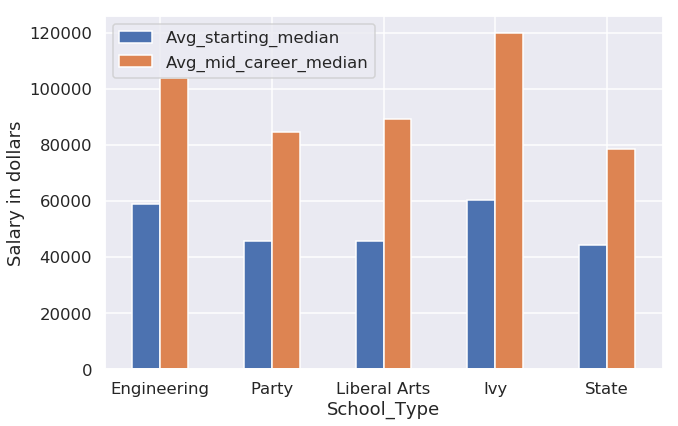

In [11]:
Salary.plot.bar(x = 'School_Type',figsize = (10,6.5),rot = 0)
plt.ylabel('Salary in dollars')

From this bar plot it looks like Party, Liberal arts, and State schools have lower starting and mid career salaries than that of Engineering and Ivy League. 

In order to see if this difference is statistically significant we decided to run an ANOVA test for the difference in average salary for the different school types.
We tested- 

H0: The mean starting salary is the same for all school types.

H1: The mean starting salary is not the same for all school types.

In [12]:
mod1 = ols('Starting_Median_Salary ~ School_Type',data=df_merge).fit()
anova_table = sm.stats.anova_lm(mod1,type=2)
print(anova_table)

                df        sum_sq       mean_sq          F        PR(>F)
School_Type    4.0  5.533638e+09  1.383410e+09  66.561438  7.056857e-39
Residual     264.0  5.486963e+09  2.078395e+07        NaN           NaN


/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


We have a very low p-value therefore we reject the null hypothesis in favor of the alternative and conclude that there is statistical evidence that the starting salary is affected by the type of school attended. Now we will look at the mid career median assuming the same null and alternative hypothesis.

In [13]:
mod2 = ols('Mid_Career_Median_Salary ~ School_Type',data=df_merge).fit()
anova_table = sm.stats.anova_lm(mod2,type=2)
print(anova_table)

                df        sum_sq       mean_sq          F        PR(>F)
School_Type    4.0  2.445324e+10  6.113310e+09  52.694356  1.349855e-32
Residual     264.0  3.062783e+10  1.160145e+08        NaN           NaN


/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Again we have a very low p-value so we arrive at the same conclusion as for the starting median salary.

Now we want to look at how the salaries are different between the regions the schools are located in.
Just like how we did earlier, we print out the means for schools in different regions, select the average starting median and the average mid career median, and input those into a new dataframe to plot from.

In [14]:
print(df_merge.loc[df_merge['Region']=="Northeastern"].mean())
print(df_merge.loc[df_merge['Region']=="California"].mean())
print(df_merge.loc[df_merge['Region']=="Southern"].mean())
print(df_merge.loc[df_merge['Region']=="Western"].mean())
print(df_merge.loc[df_merge['Region']=="Midwestern"].mean())
region = {'1':["Northeastern",49267.142857,93518.571429],
          '2':["California",50155.555556,91633.333333],
         '3':["Southern", 44288.235294,80302.941176],
          '4':["Western",44151.282051,78135.897436],
         '5':["Midwestern",43801.5625,77637.5000]}
Region = pd.DataFrame.from_dict(region,orient = 'index',
                                columns=['Region',
                                        'Avg_starting_median',
                                    'Avg_mid_career_median'])
Region

Starting_Median_Salary                49267.142857
Mid_Career_Median_Salary              93518.571429
Mid_Career_25th_Percentile_Salary     66601.428571
Mid_Career_75th_Percentile_Salary    133350.000000
dtype: float64
Starting_Median_Salary                50155.555556
Mid_Career_Median_Salary              91633.333333
Mid_Career_25th_Percentile_Salary     66096.296296
Mid_Career_75th_Percentile_Salary    124844.444444
dtype: float64
Starting_Median_Salary                44288.235294
Mid_Career_Median_Salary              80302.941176
Mid_Career_25th_Percentile_Salary     57839.705882
Mid_Career_75th_Percentile_Salary    110188.235294
dtype: float64
Starting_Median_Salary                44151.282051
Mid_Career_Median_Salary              78135.897436
Mid_Career_25th_Percentile_Salary     56238.461538
Mid_Career_75th_Percentile_Salary    106161.538462
dtype: float64
Starting_Median_Salary                43801.5625
Mid_Career_Median_Salary              77637.5000
Mid_Career_25th_Percentile

,Region,Avg_starting_median,Avg_mid_career_median
1,Northeastern,49267.142857,93518.571429
2,California,50155.555556,91633.333333
3,Southern,44288.235294,80302.941176
4,Western,44151.282051,78135.897436
5,Midwestern,43801.562500,77637.500000


Text(0, 0.5, 'Salary in dollars')

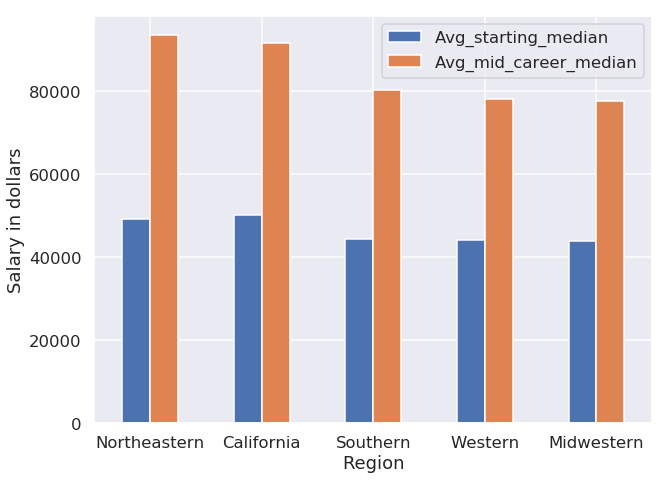

In [15]:
Region.plot.bar(x = 'Region',figsize = (10,7.5),rot = 0)
plt.ylabel('Salary in dollars')

Again both the starting and mid career salaries appear to be different so we want to test to see if the difference is statistically significant. We proceed with ANOVA testing for- 

H0: The average salary is the same for all regions.

H1: the starting salary is not the same for all regions.

In [16]:
mod3 = ols('Starting_Median_Salary ~ Region',data=df_merge).fit()
anova_table = sm.stats.anova_lm(mod3,type=2)
print(anova_table)

             df        sum_sq       mean_sq         F        PR(>F)
Region      4.0  1.854800e+09  4.637001e+08  13.36962  6.234456e-10
Residual  263.0  9.121659e+09  3.468311e+07       NaN           NaN


/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [17]:
mod4 = ols('Mid_Career_Median_Salary ~ Region',data=df_merge).fit()
anova_table = sm.stats.anova_lm(mod4,type=2)
print(anova_table)

             df        sum_sq       mean_sq          F        PR(>F)
Region      4.0  1.277600e+10  3.193999e+09  19.861213  2.654115e-14
Residual  263.0  4.229459e+10  1.608159e+08        NaN           NaN


/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The p-value is very low for both mid career and starting salaries so we conclude that the region that the school is located in does in fact affect the salary for the graduate.

Now we know that the school type and school region both affect the salaries of the students, we want to see how much the salaries differ.

We will first take a look at the numerical increase in salaries for students from schools in different regions.
We add a new column called "value_growth" in the dataframe df_merge. The value growth is computed by subtracting the starting median salary from the mid career median salary.

Then we calculate the mean of the value difference for each regions, look at the results from the printed statements and manually construct a new dataframe called Value_growth, and input those values.

In [18]:
df_merge['value_growth'] = df_merge['Mid_Career_Median_Salary'] -\
df_merge['Starting_Median_Salary']
print(df_merge.loc[df_merge['Region']=="Northeastern"].mean())
print(df_merge.loc[df_merge['Region']=="California"].mean())
print(df_merge.loc[df_merge['Region']=="Southern"].mean())
print(df_merge.loc[df_merge['Region']=="Western"].mean())
print(df_merge.loc[df_merge['Region']=="Midwestern"].mean())

Starting_Median_Salary                49267.142857
Mid_Career_Median_Salary              93518.571429
Mid_Career_25th_Percentile_Salary     66601.428571
Mid_Career_75th_Percentile_Salary    133350.000000
value_growth                          44251.428571
dtype: float64
Starting_Median_Salary                50155.555556
Mid_Career_Median_Salary              91633.333333
Mid_Career_25th_Percentile_Salary     66096.296296
Mid_Career_75th_Percentile_Salary    124844.444444
value_growth                          41477.777778
dtype: float64
Starting_Median_Salary                44288.235294
Mid_Career_Median_Salary              80302.941176
Mid_Career_25th_Percentile_Salary     57839.705882
Mid_Career_75th_Percentile_Salary    110188.235294
value_growth                          36014.705882
dtype: float64
Starting_Median_Salary                44151.282051
Mid_Career_Median_Salary              78135.897436
Mid_Career_25th_Percentile_Salary     56238.461538
Mid_Career_75th_Percentile_Salary    

In [19]:
value_growth = {'1':["Northeastern",44251.428571],'2':["California",41477.777778],
          '3':["Southern",36014.705882],'4':["Western",33984.615385],
          '5':["Midwestern",33835.937500]}
Value_growth = pd.DataFrame.from_dict(value_growth,orient = 'index',
                                      columns=['Region',
                                               'Avg_value_growth'])

In [20]:
Value_growth

,Region,Avg_value_growth
1,Northeastern,44251.428571
2,California,41477.777778
3,Southern,36014.705882
4,Western,33984.615385
5,Midwestern,33835.937500


Here we see that on average, students from schools in the Northest and California earn around 40000 and 41000 more dollars from graduation to the middle of their careers. Followed by students from schools in the South, West, and Midwest, each earning less (from graduation to mid career) than the previous regions.

Now we look at the how much percent increase the students from different types of schools make.
We add another column called "precent_growth" to the dataframe. The percent growth is calculated using:
(Mid career median salary - Starting median salary) / Starting median salary.

In [21]:
df_merge['percent_growth'] = (df_merge['Mid_Career_Median_Salary'] - \
                              df_merge['Starting_Median_Salary'])\
                                / df_merge['Starting_Median_Salary']
print(df_merge.loc[df_merge['School_Type']=="Engineering"].mean())
print(df_merge.loc[df_merge['School_Type']=="Party"].mean())
print(df_merge.loc[df_merge['School_Type']=="Liberal Arts"].mean())
print(df_merge.loc[df_merge['School_Type']=="Ivy League"].mean())
print(df_merge.loc[df_merge['School_Type']=="State"].mean())

Starting_Median_Salary                59057.894737
Mid_Career_Median_Salary             103842.105263
Mid_Career_25th_Percentile_Salary     81384.210526
Mid_Career_75th_Percentile_Salary    134868.421053
value_growth                          44784.210526
percent_growth                            0.759268
dtype: float64
Starting_Median_Salary                45715.00000
Mid_Career_Median_Salary              84685.00000
Mid_Career_25th_Percentile_Salary     60005.00000
Mid_Career_75th_Percentile_Salary    118100.00000
value_growth                          38970.00000
percent_growth                            0.85388
dtype: float64
Starting_Median_Salary                45746.808511
Mid_Career_Median_Salary              89378.723404
Mid_Career_25th_Percentile_Salary     61936.170213
Mid_Career_75th_Percentile_Salary    131076.595745
value_growth                          43631.914894
percent_growth                            0.949769
dtype: float64
Starting_Median_Salary                60475

We manually construct another dataframe called Percent_growth, using the relevant mean values of the percent growth from the print statements. 

Note that we also multiply the values by 100 so that the plot shows a percentage range from 1 to 100.

In [22]:
percent_growth = {'1':["Engineering",0.759268*100],'2':["Party",0.85388*100],
          '3':["Liberal Arts", 0.949769*100],'4':["Ivy",0.987949*100],
          '5':["State",0.777584*100]}
Percent_growth = pd.DataFrame.from_dict(percent_growth,orient = 'index',
                                        columns=['School_Type',
                                                 'Avg_percent_growth'])
Percent_growth

,School_Type,Avg_percent_growth
1,Engineering,75.9268
2,Party,85.3880
3,Liberal Arts,94.9769
4,Ivy,98.7949
5,State,77.7584


Text(0, 0.5, 'Percent growth')

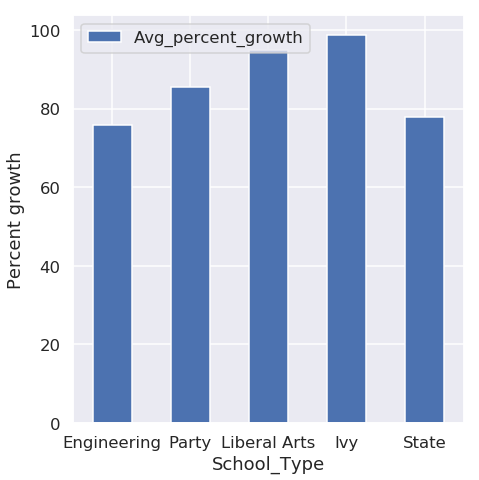

In [23]:
Percent_growth.plot.bar(x = 'School_Type',figsize = (7,7.5),rot = 0)
plt.ylabel('Percent growth')

From the bar plot, we see that quite surprisingly, engineering schools' students don't have a high payoff as we assumed at the start of this section, in fact, they have the least percentage increase in salaries. Instead, liberal arts and Ivy league students' salaries increased by over 90%, followed by party schools and state schools' students.

Now we turn our attention to the College scorecard dataset. First we want to plot the relationship between the mean and median earning after college verses the cost of attendence since this should tell us if the more expensive schools do in fact lead to higher paying jobs.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

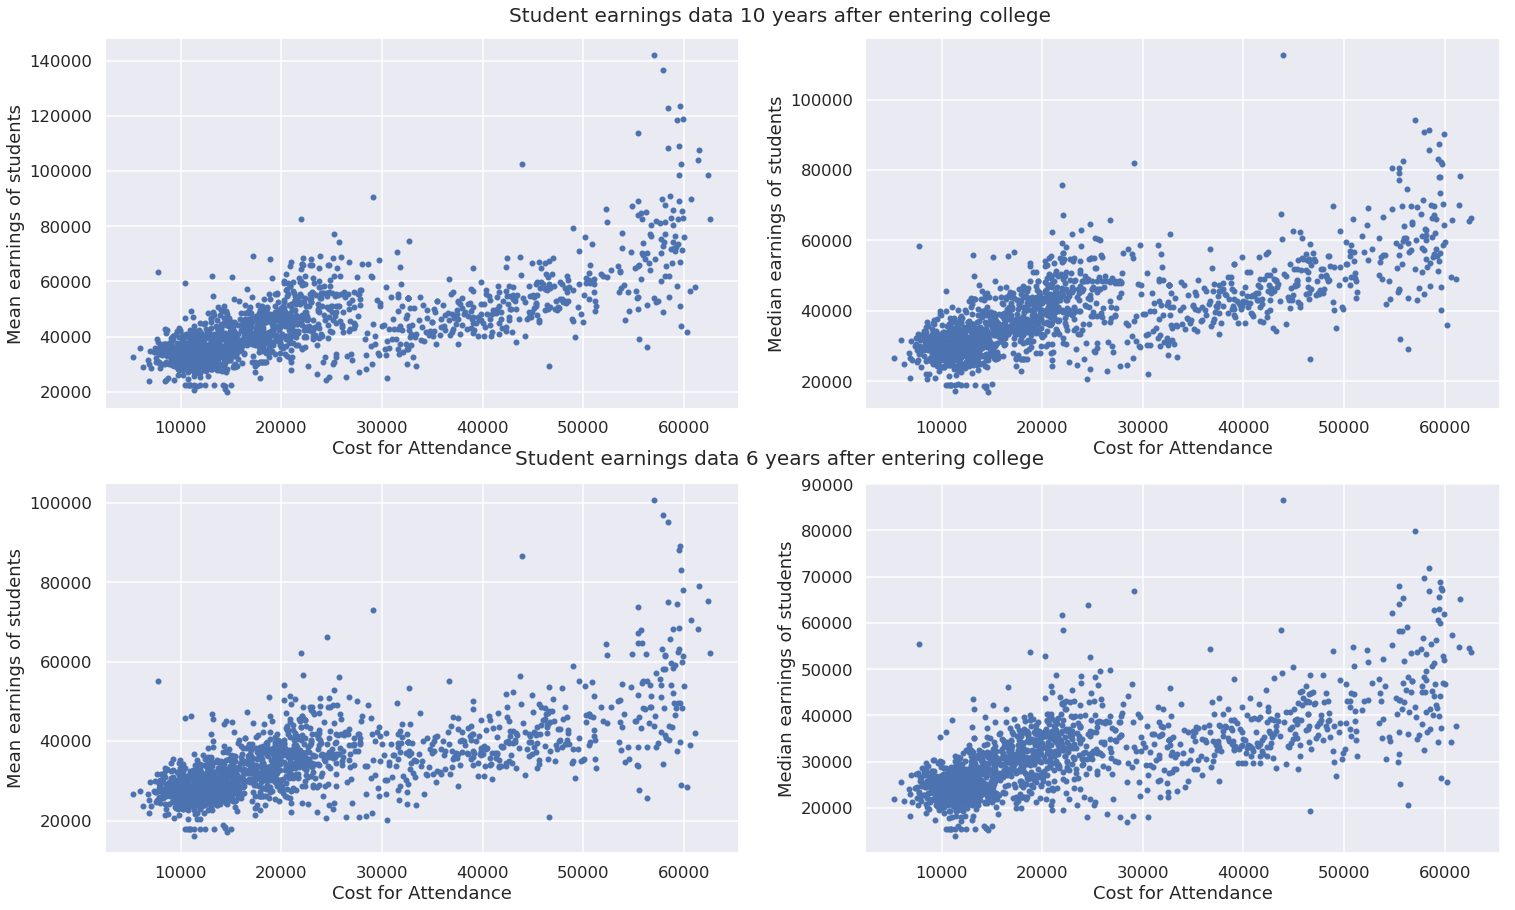

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
ax = df.plot.scatter(x=avg_cost_of_attendance_academic_institutions,
                     y=mean_earnings_of_students_wne_10y_after_entry,
                     ax=axes[0,0])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Mean earnings of students')
ax = df.plot.scatter(x=avg_cost_of_attendance_academic_institutions,
                     y=median_earnings_of_students_wne_10y_after_entry,
                     ax=axes[0,1])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Median earnings of students')

ax = df.plot.scatter(x=avg_cost_of_attendance_academic_institutions,
                     y=mean_earnings_of_students_wne_6y_after_entry,
                     ax=axes[1,0])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Mean earnings of students')
ax = df.plot.scatter(x=avg_cost_of_attendance_academic_institutions,
                     y=median_earnings_of_students_wne_6y_after_entry,
                     ax=axes[1,1])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Median earnings of students')

# Add plot title for the entire subplot row
fig.text(0.5, 0.90, 'Student earnings data 10 years after entering college',
         ha='center', va='center', fontsize=20)
fig.text(0.5, 0.49, 'Student earnings data 6 years after entering college',
         ha='center', va='center', fontsize=20)

f1 = plt.gcf()

The scatter plots displayed above show the relationship between cost of attendance for institutions and the earnings of the students that attended those institutions. The plots on the left show the mean earnings, and the plots on the right show the median earnings. The shape of the plots are approximately the same for mean vs the median, which shows that there are not many outliers in the student earnings that skew the data. The shapes of the plots also do not differ significantly between the 6 year period, and the 10 year period. The main difference is that the upper bound on the data is higher for the 10 year earnings data. There appears to be a weak positive correlation between cost of attendance and the average earnings of students. This means there may be additional factors that determine the earnings of students after college.

To further analyze the relationship, we run a regression on the relation between the cost of attendance and the median earnings after 6 years.

In [25]:
outcome_1, predictors_1 = patsy.dmatrices('COSTT4_A ~ MD_EARN_WNE_P6',
                            df, return_type = "matrix")
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               COSTT4_A   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1547.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          1.12e-236
Time:                        23:21:05   Log-Likelihood:                -16881.
No. Observations:                1588   AIC:                         3.377e+04
Df Residuals:                    1586   BIC:                         3.378e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.228e+04    928.587    -13.

A R squared value of 0.494 shows that the correlation is very weak.

We do another regression on the relation between the cost of attendance and the median earnings after 10 years.

In [26]:
outcome_2, predictors_2 = patsy.dmatrices('COSTT4_A ~ MD_EARN_WNE_P10',
                            df, return_type = "matrix")
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:               COSTT4_A   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1815.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          5.52e-265
Time:                        23:21:05   Log-Likelihood:                -16815.
No. Observations:                1588   AIC:                         3.363e+04
Df Residuals:                    1586   BIC:                         3.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.256e+04    865.977    -

Again, a 0.534 R squared value stills shows a weak correlation.

One of the questions we wished to answer was whether or not private universities lead to higher paying jobs than public universities. 

We subsetted our data into the public and private universities then we looked into the difference in the mean earnings for public universities. We looked at both the 6 year after entry information and 10 year after entry information.

We tested the following hypothesis using a 2 sample t-test for difference in means

H0: The average earnings of students after graduation is the same for public and private universities

H1: The average earnings of students after graduation is different.

In [27]:
public_institutions = df[df[ownership] == 1]
private_institutions = df[df[ownership] != 1]
mean_public_10y = \
public_institutions[mean_earnings_of_students_wne_10y_after_entry].\
mean()
mean_private_10y =\
private_institutions[mean_earnings_of_students_wne_10y_after_entry].\
mean()

mean_public_6y = \
public_institutions[mean_earnings_of_students_wne_6y_after_entry].\
mean()
mean_private_6y = \
private_institutions[mean_earnings_of_students_wne_6y_after_entry].\
mean()

print(ttest_ind(public_institutions[mean_earnings_of_students_wne_10y_after_entry],
         private_institutions[mean_earnings_of_students_wne_10y_after_entry]))
print(ttest_ind(public_institutions[mean_earnings_of_students_wne_6y_after_entry],
      private_institutions[mean_earnings_of_students_wne_6y_after_entry] ))

Ttest_indResult(statistic=-19.352536308497477, pvalue=4.4658330544652271e-75)
Ttest_indResult(statistic=-18.995241771645855, pvalue=1.1796391949227921e-72)


We got a p-value very close to zero for both the 6 year and 10 year data. Therefore, we reject the null hypothesis in favor of the alternative and conclude that private and public institutions do in fact lead to a difference in salary.

In [28]:
print('meanpublic_10y:',mean_public_10y)
print('meanprivate_10y:',mean_private_10y)

print('meanpublic_6y:',mean_public_6y)
print('meanprivate_6y:',mean_private_6y)


meanpublic_10y: 40029.8736462
meanprivate_10y: 53150.8333333
meanpublic_6y: 31751.3537906
meanprivate_6y: 40678.3333333


We note that the mean salary for public universities 10 years after entry is around 40030 dollars while private universities is around 53150 dollars. Then for 6 year data we see the average salary for public is 31751 dollars and for private 40678 dollars. That appears to be a significant difference in salary and we believe that private universities do in fact lead to higher paying jobs.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

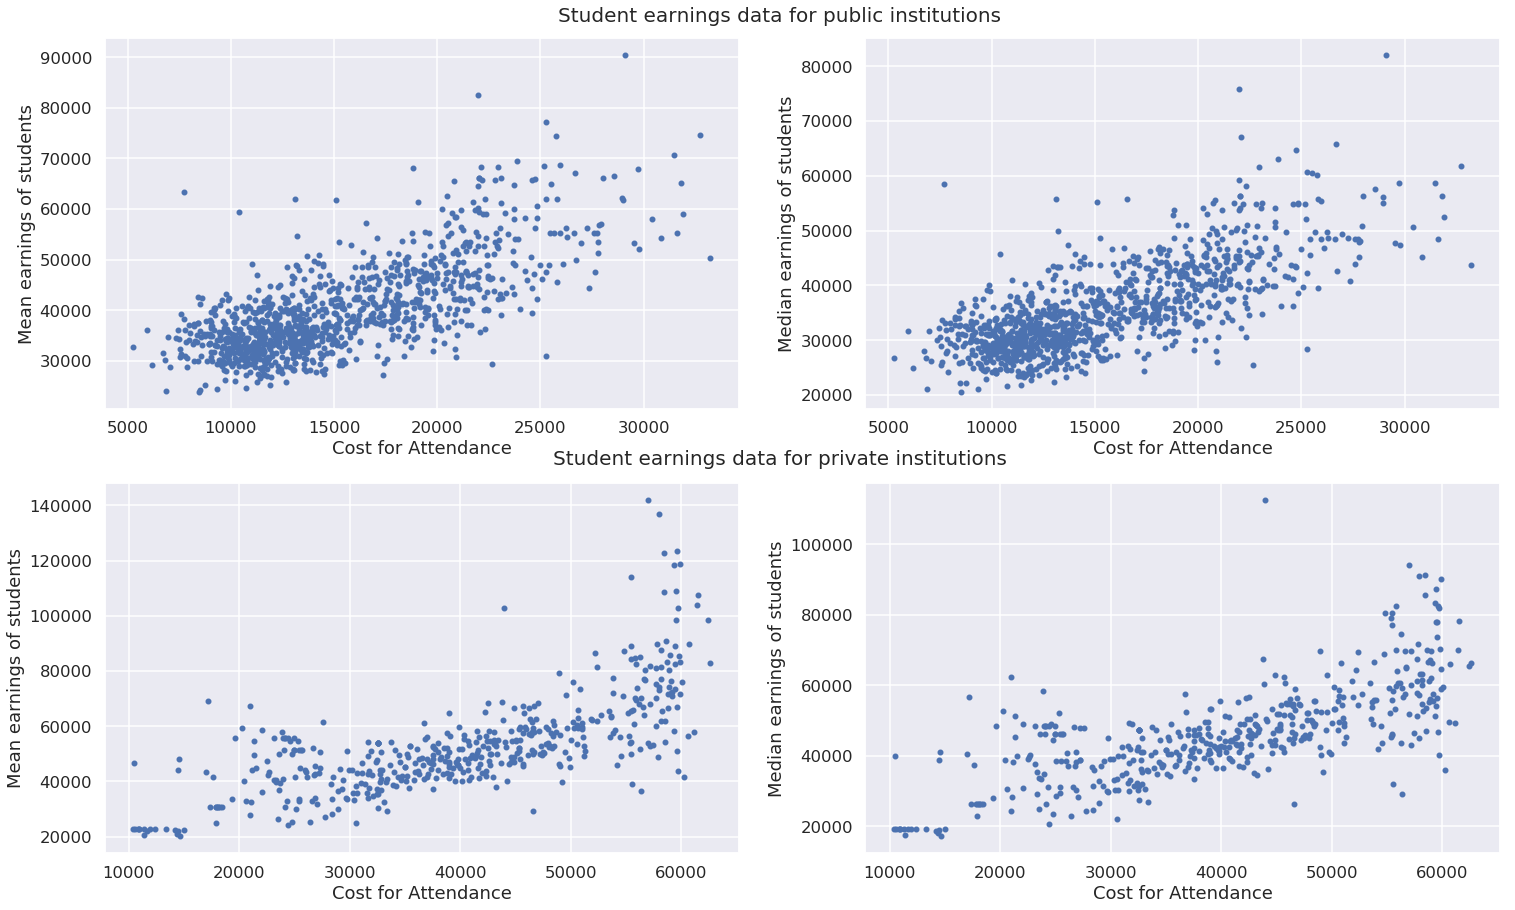

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
ax = public_institutions.plot.scatter(\
                x=avg_cost_of_attendance_academic_institutions,
                y=mean_earnings_of_students_wne_10y_after_entry,
                            ax=axes[0,0])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Mean earnings of students')
ax = public_institutions.plot.scatter(x=avg_cost_of_attendance_academic_institutions,
                        y=median_earnings_of_students_wne_10y_after_entry,
                        ax=axes[0,1])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Median earnings of students')

ax = private_institutions.plot.scatter(x=avg_cost_of_attendance_academic_institutions,
                y=mean_earnings_of_students_wne_10y_after_entry,
                                       ax=axes[1,0])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Mean earnings of students')
ax = private_institutions.plot.scatter(x=avg_cost_of_attendance_academic_institutions,
                y=median_earnings_of_students_wne_10y_after_entry,
                                       ax=axes[1,1])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Median earnings of students')

# Add plot title for the entire subplot row
fig.text(0.5, 0.90, 'Student earnings data for public institutions',
         ha='center', va='center', fontsize=20)
fig.text(0.5, 0.49, 'Student earnings data for private institutions',
         ha='center', va='center', fontsize=20)

f2 = plt.gcf()

From the above plots, we can see that when the institutions are separated into public vs private, there still appears to be a positive correlation between cost of attendance and average earnings. From earlier analysis, the 6 year and 10 year periods had similar results, so only the 10 year period was used to compare public and private institutions. Since the correlation still appears to be weak, we cannot confidently depend on cost of attendance to predict the average earnings of students.

We run regression again. This time on the relation between cost of attendance for public schools and median earnings after 10 years.

In [30]:
outcome_3, predictors_3 = patsy.dmatrices('COSTT4_A ~ MD_EARN_WNE_P10',
                        public_institutions,return_type = "matrix")
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:               COSTT4_A   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     1255.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          2.25e-184
Time:                        23:21:09   Log-Likelihood:                -10591.
No. Observations:                1108   AIC:                         2.119e+04
Df Residuals:                    1106   BIC:                         2.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -724.0125    465.710     

Still a weak correlation with R squared value of 0.532

We run another regression on the relation between cost of attendance for private schools and median earnings after 10 years.

In [31]:
outcome_4, predictors_4 = patsy.dmatrices('COSTT4_A ~ MD_EARN_WNE_P10',
                    private_institutions,return_type = "matrix")
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:               COSTT4_A   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     511.1
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           1.69e-77
Time:                        23:21:09   Log-Likelihood:                -5049.4
No. Observations:                 480   AIC:                         1.010e+04
Df Residuals:                     478   BIC:                         1.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8780.5406   1449.194     

Again, 0.517 as the R squred value proves a weak correlation. 
Although by looking at graphs, there seems to be a linear relation between all the above mentioned variables, the 4 regressions that we ran all actually show that the relations are not strong.

Debt is another huge consideration when going to college and we wanted to investigate how much debt students aquire and how long it would typically take to pay off. We found the average amount of debt students left college with and assuming the debt has a 5.5% interest rate (which is the current interest rate for federal student loans) we plotted how long it would take for a student to pay off their debt assuming they are making the average amount students make after college and paying 10% of their salary toward the debt each year.

In [32]:
md_earning6 = df['MD_EARN_WNE_P6'].mean()
avg_earning6 = df['MN_EARN_WNE_P6'].mean()
avg_cost = df['COSTT4_A'].mean()

cost_leaving = 4*avg_cost
md_dbt_leaving = df['GRAD_DEBT_MDN'].mean()
#Plotting with interest
y = [0]*8
y[0]= md_dbt_leaving
for i in range(1,8):
    y[i]= y[i-1]*(1.055)-.10*(md_earning6)
    

#without interest the years to recoup investement
yrs_in= cost_leaving/md_earning6
#This is about 3


Text(0, 0.5, 'Debt in Dollars')

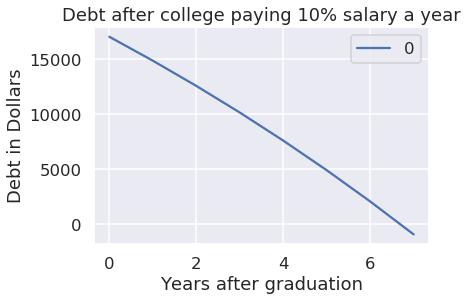

In [33]:
yf = pd.DataFrame(y)
yf.plot(title= 'Debt after college paying 10% salary a year')
plt.xlabel('Years after graduation')
plt.ylabel('Debt in Dollars')

Note that it would take approximately 7 years for an average student to pay back their student loans.

The last thing we wanted to look at was the relationship between states and the distribution of the earnings of students that graduate college in those states. We plotted a violin chart which estimates the distribution for each state.

Text(0, 0.5, 'Mean earnings after entry 6 years')

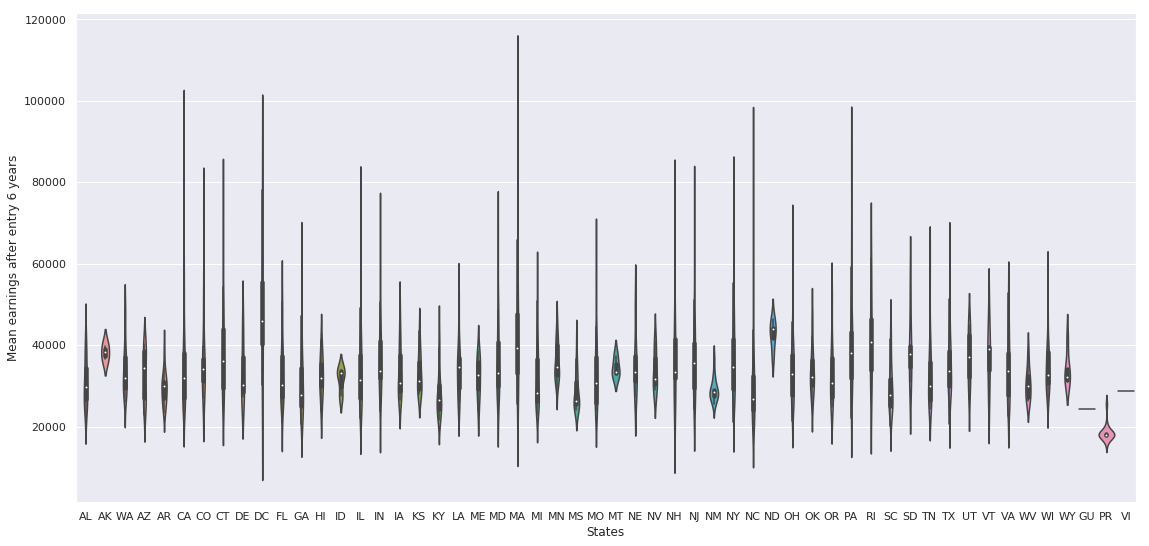

In [34]:
sns.set(rc={'figure.figsize':(19,9)})
sns.violinplot(x= df["STABBR"],y=df["MN_EARN_WNE_P6"])

plt.xlabel('States')
plt.ylabel('Mean earnings after entry 6 years')

Looking at the violin plot we can see large difference in distributions between the states. Most notibly California, DC, Massachusets, North Carolina, and Pensylvania have some of the highest variation. Also, Washington DC had quite significantly the highest mean earnings after graduation. This variation between states is something that is worth investigating in the future on new datasets.

# Ethics & Privacy

The costs of schooling have been rising recently and we want people to be the most informed as to whether the cost of schooling is worth the money based on the expected payoff of their chosen degree type. We do not intend to discourage people from attending college or pursuing their passions and if our data ends up showing that certain areas or degrees are not profitable we hope that it does not have a large impact on the people who chose that area of study.

We are not seeking to influence institutions to make more profit or increase the cost of attendance.

Throughout the collection of data, we hoped to show how the salaries out of college compare to the increase of cost for attendance. Is it ethical for colleges to continue charging students this much especially if they do not proportionally increase their resources to match the increase in students attending? If they are taking in more resources and money per student, where is the extra money going, if not towards the students?

We obtained our data from different datasets. Our primary dataset is the U.S. Department of Education College Scorecard Database. This source is widely known and regulated and thus proposes minimal risks in terms of bias. Our other dataset is from the Wall Street Journal which proposes minimal risk as well. Although, the sources are well-known and risks seems minimal, without knowing exactly how the data was collected, we cannot claim that the data is unbiased. In fact, being completely unbiased is not necessarily achievable. Instead, we have outlined the possible biases below so that viewers are aware of potential biases as they view the analysiswe have performed.

Our data is biased towards larger schools and schools that supply four year degrees. This is due to selection bias; we chose schools with populations that met a certain threshold and offered specific degrees. Our results do not account for those with less than 2000 students or trade schools. Thus, our conclusions cannot be held as accurate for any type of higher education. We also removed schools that had missing or withheld information, therefore closing in our sample to schools that were more well-known or more accessible.

Thus, our analysis includes what we and the datasets we collected from deem as elite institutions or institutions that are more commmonly discussed. The exact characteristics of elite institutions in the U.S. is unclear and thus poses a limitation towards what schools this analysis can apply to.

After analysis, our compiled data analysis is available to the public on github. All data used in this project is open source and does not include personal details of individuals. Thus, it does not raise any ethical concerns. All analysis on the data is being done for educational purposes and to raise awareness. The project is not being used for personal gain; it is merely informative for the public.

As specified above, the data and analysis is done only for institutions in the U.S. Other countries may be able to use our analysis as a template, however, the analysis cannot be applied to the state of higher education in other parts of the world.

Our project does not specifically target any institutions and makes claim solely on the data. No outside information is excluded from the analysis provided.

Our results do represent what certain types of institutions as more advantageous. We do not mean to hinder attendance at other schools. We simply want to inform those looking to see what different categories of institutions provide. For instance, our results show that California schools tend to be better in the long run. However, our results do not state nor imply that schools outside California are incapable of providing good futures for their attendees.


# Conclusion & Discussion

From the analysis above, we have concluded that the type of school and the region of the school both affect starting and mid-career salaries. Ivy league schools tend to be the highest earning followed by Engineering schools. Liberal Arts, Party, and State schools all tend to be lower earnings than the other two types of institutions with minimal difference among them. When looking at regions, we found that schools in the Northeastern region are the best in terms of mid career salary and California is the second best. This could possibly be due to the fact that most Ivy League schools are in the Northeastern region. In terms of average starting salary, however, California ranks first and is followed very closely by Northeastern. Although in this sample, California is higher than Northeastern for starting salary, we would have to analyze more datasets to determine the significance of this difference. After that, Southern, Western, and Midwestern regions, all tend to have lower starting salaries. We suspect that this is due to the fact that most tech and banking industries are found on the coasts. The last three regions have very minimal difference in their average starting salary.

When looking at percent growth for school types, Ivy leagues showed the most average percent growth. Liberal arts had the 2nd best average percent growth. In fact, and contrary to our hypothesis, party, liberal art, and state schools had a higher percent growth than engineering schools that fell in last place for growth compared to our initial hypothesis of it having the highest potential growth. 

The biggest overall potential for highest salaries lies within Ivy League schools since they have the highest mid-career salary, a high starting salary, and the highest average percent growth of types of schools. Engineering had high potential starting salaries, but their potential growth is considerably lower. This should be a consideration when looking into possible institutions to attend. 

We hoped to be able to predict potential salaries from the cost of school, but our regression analysis of cost of attendance versus earning of students did not yield a good regression model. Through our regression model, we found that the cost of attendance does not accurately predict the earnings of students. While there does tend to be a higher payoff for more expensive schools, and private schools tend to be more costly than public schools, the correlation is not high enough for us to predict payoffs.

We wanted to look at years past 2014, however we were only able to account up to the year 2014. Data found for later years was incomplete and therefore, we could not analyze it.

Possible limitations in our analysis arise from the fact that we did not include any institutions that had missing or withheld information. Also, by excluding smaller institutions, those with less than 2000 attendees, we had hoped to eliminate trade schools from our analysis. For the most part, this worked, however, a few arts and non-degree providing schools were still left in the data. Due to the large amount of data we had, we were unable to fully remove all trade schools (we could not go through them one-by-one). This could have had an effect on our results.

We also did not have information on scholarships that may have played into account the worth of a college. In the future, we would include information about grants and scholarships since it would affect the debt from and cost of attending an institution. 